In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [3]:
# 1. Load
df = pd.read_csv('advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
 df.duplicated().sum()

0

In [17]:
print(df.dtypes)


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


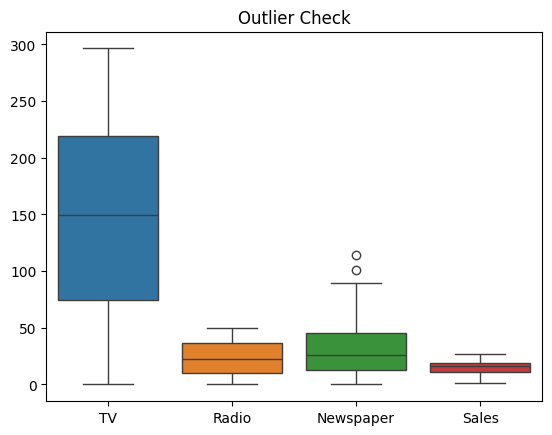

In [19]:
sns.boxplot(data=df)
plt.title("Outlier Check")
plt.show()


In [21]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
newspaper_outliers = df[(df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)]
print(newspaper_outliers)


        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [23]:
df = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]


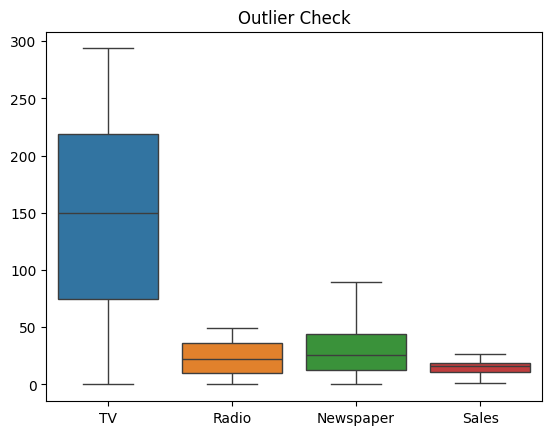

In [25]:
sns.boxplot(data=df)
plt.title("Outlier Check")
plt.show()


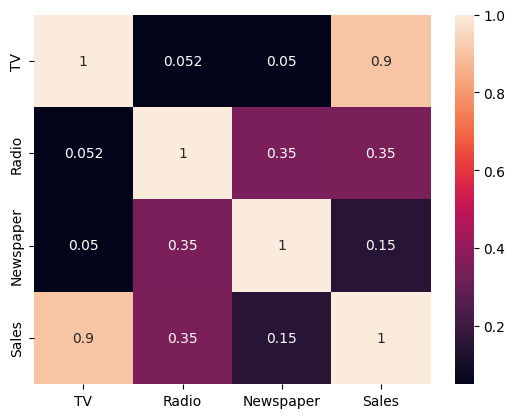

In [27]:
sns.heatmap(df.corr(), annot=True); plt.show()

In [29]:
# 3. Multiple Regression
X = df[['TV','Radio','Newspaper']]
y = df['Sales']  # Dependent variable



In [31]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
 #Build and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [37]:
#Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [39]:
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


R² Score: 0.913
Mean Squared Error: 2.416


In [41]:

#  Coefficients and Intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Model Coefficients:
TV: 0.054
Radio: 0.101
Newspaper: 0.007
Intercept: 4.624


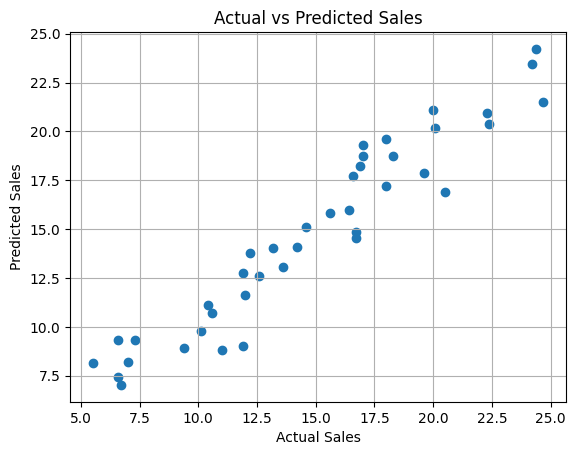

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


📈 Predicted Sales for new input: 18.05 units


In [51]:
pickle.dump(model, open('modelsales.pkl','wb'))